In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/institutional-performance-in-bise-fsc-exam-2023/Institutional Result of Board Exams.csv


# 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1:Load the dataset

In [3]:
data = pd.read_csv('/kaggle/input/institutional-performance-in-bise-fsc-exam-2023/Institutional Result of Board Exams.csv')

# Display the first few rows
print(data.head())

   Institutional_Code  Appeared  Passed  Pass%  Grade A+     A     B      C  \
0            200109.0     458.0   216.0  47.16       6.0  35.0  61.0   94.0   
1            200110.0     469.0   293.0  62.47      16.0  41.0  95.0  115.0   
2            200122.0     387.0   230.0  59.43      15.0  31.0  80.0   89.0   
3            200124.0     183.0    89.0  48.63       1.0   8.0  22.0   45.0   
4            200125.0     196.0   133.0  67.86       6.0  23.0  51.0   46.0   

      D    E  
0  20.0  NaN  
1  25.0  1.0  
2  14.0  1.0  
3  13.0  NaN  
4   7.0  NaN  



# 1.2:Summary statistics

In [4]:
print(data.describe())

       Institutional_Code     Appeared      Passed       Pass%    Grade A+  \
count          389.000000   389.000000  387.000000  388.000000  284.000000   
mean        250215.133676   142.663239   94.720930   61.510131   21.651408   
std          52114.147775   176.817665  129.790324   21.094087   41.558188   
min         200109.000000     1.000000    0.000000    0.000000    1.000000   
25%         201532.000000    44.000000   23.500000   49.397500    2.000000   
50%         201645.000000    90.000000   56.000000   61.955000    8.000000   
75%         306825.000000   168.000000  112.000000   78.427500   21.000000   
max         307219.000000  1175.000000  852.000000  100.000000  315.000000   

               A           B           C           D          E  
count  346.00000  354.000000  374.000000  317.000000  29.000000  
mean    21.82948   29.677966   26.893048    7.359621   1.965517  
std     33.00553   36.259503   32.642664    9.449232   2.061254  
min      1.00000    1.000000    1

# 1.3:Visualize grade distribution

In [5]:
# Use correct column names
grades = ['Grade A+', 'A', 'B', 'C', 'D', 'E']
grade_counts = data[grades].sum()


# 1.4:Grade distribution

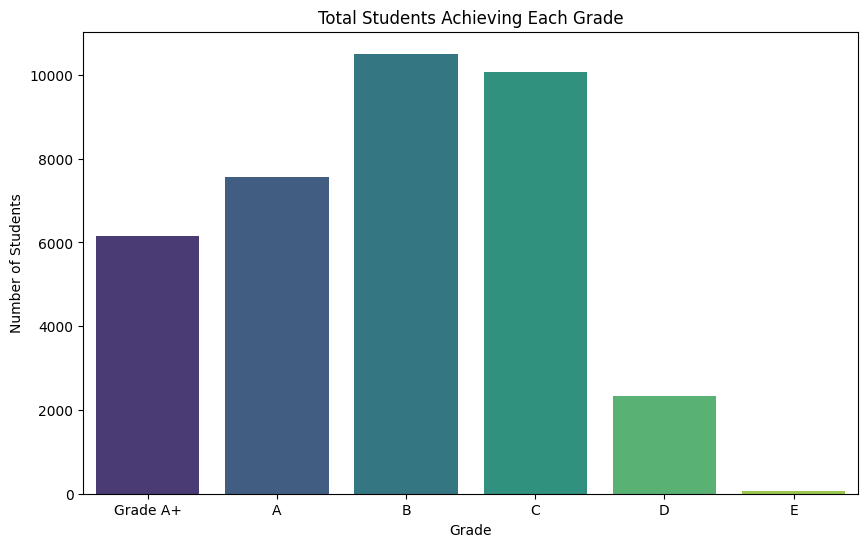

In [6]:

# Plot the grade distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='viridis')
plt.title('Total Students Achieving Each Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()


# 1.5:Visualize passing percentage

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


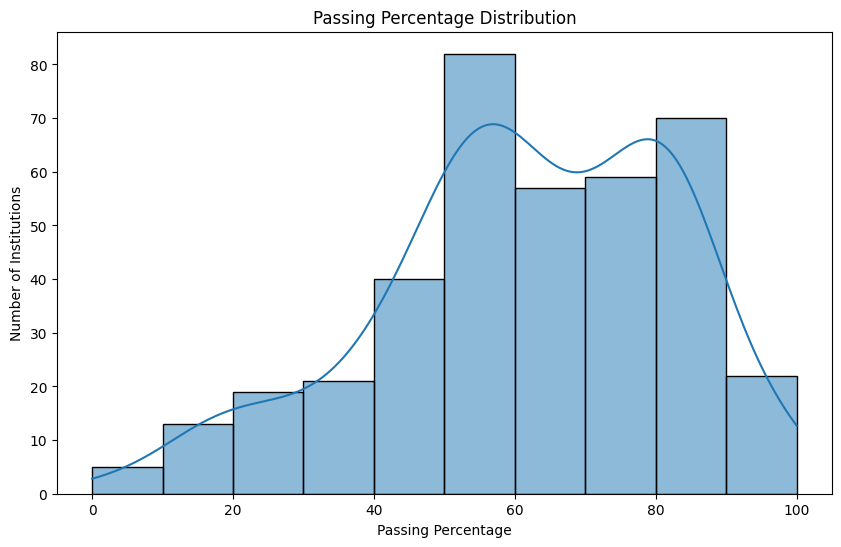

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Pass%'], bins=10, kde=True)
plt.title('Passing Percentage Distribution')
plt.xlabel('Passing Percentage')
plt.ylabel('Number of Institutions')
plt.show()


# 1.6:handle missing values

In [8]:

# Check for missing values
print(data.isnull().sum())

# Handle missing values by filling them with the mean of each column
data.fillna(data.mean(), inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())


Institutional_Code     60
Appeared               60
Passed                 62
Pass%                  61
Grade A+              165
A                     103
B                      95
C                      75
D                     132
E                     420
dtype: int64
Institutional_Code    0
Appeared              0
Passed                0
Pass%                 0
Grade A+              0
A                     0
B                     0
C                     0
D                     0
E                     0
dtype: int64


# 2.Clustering Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2.1:Scale the data

In [10]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Pass%', 'Appeared']])


# 2.2:K-Means model

In [11]:
# K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# 2.3:Add cluster

In [12]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_


# 2.4:Visualize clusters

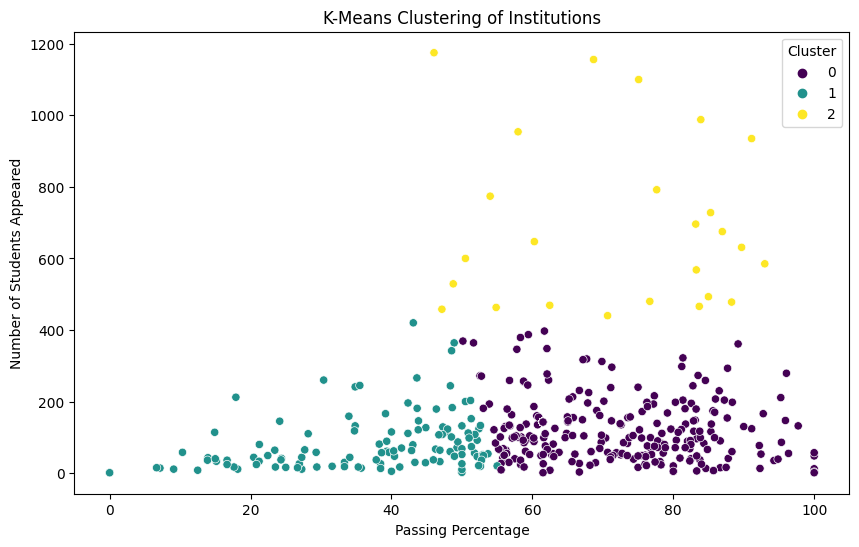

In [13]:

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pass%', y='Appeared', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Institutions')
plt.xlabel('Passing Percentage')
plt.ylabel('Number of Students Appeared')
plt.legend(title='Cluster')
plt.show()
